# Evaluating Past Returns

### More Machine Learning
### Kerry Back, JGSB, Rice University

<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/10_attribution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Outline

1. Evaluating without benchmarking - Sharpe ratios and drawdowns
2. Naive benchmarking
3. Benchmarking - alphas and information ratios
4. Attribution analysis - alphas and betas and information ratios

### Data for example

- Monthly FMAGX returns from Yahoo Finance (FMAGX = Fidelity Magellan)
- Market return from French's data library
- Fama-French factors and momentum from French's data library

## Monthly FMAGX Returns

In [8]:
import yfinance as yf
fmagx_price = yf.download("FMAGX", start=1970)["Adj Close"]
fmagx_price_monthly = fmagx_price.resample("M").last()
fmagx_price_monthly.index = fmagx_price_monthly.index.to_period("M")
fmagx_return_monthly = fmagx_price_monthly.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


## Monthly risk-free rates from French's data library

In [6]:
from pandas_datareader import DataReader as pdr
fama_french = pdr("F-F_Research_Data_5_Factors_2x3", "famafrench", start=1970)[0] / 100
rf = fama_french["RF"]

## Evaluating without benchmarking

### Sharpe ratio

In [10]:
import numpy as np

rprem = 12 * (fmagx_return_monthly - rf).mean()
stdev = np.sqrt(12) * fmagx_return_monthly.std()
sharpe = rprem / stdev

print(f"Annualized Sharpe ratio is {sharpe:.2%}")

Annualized Sharpe ratio is 46.21%


### Drawdowns

- A drawdown is how much you've lost since the previous peak value.
- It's another way to represent risk.
- We'll use the daily FMAGX price data.

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns
sns.set_style("whitegrid")
colors = sns.color_palette()

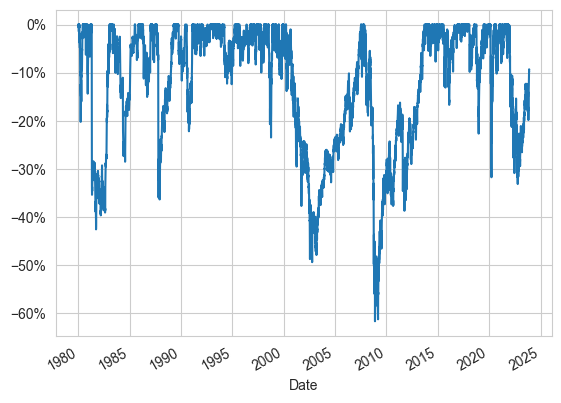

In [16]:
fig, ax = plt.subplots()
fmagx_max = fmagx_price.expanding().max()
drawdown = 100 * (fmagx_price - fmagx_max) / fmagx_max
drawdown.plot(ax=ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

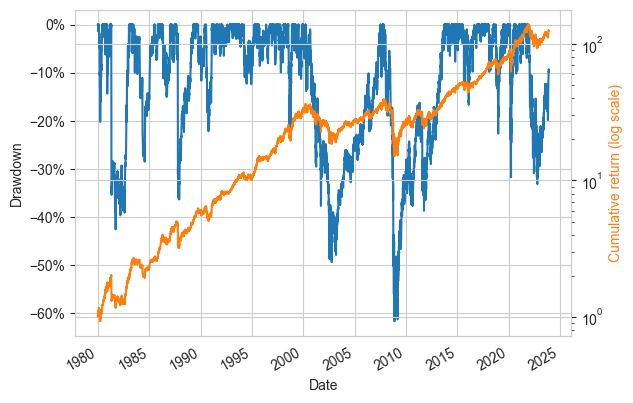

In [24]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.set_yscale("log")
drawdown.plot(ax=ax1)

cumulative_return = fmagx_price / fmagx_price.iloc[0]
cumulative_return.plot(ax=ax2, c=colors[1])

ax1.set_xlabel('Date')
ax1.set_ylabel('Drawdown')
ax2.set_ylabel('Cumulative return (log scale)', color=colors[1])

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Naive Benchmarking

- Did you beat the benchmark?
- Compute mean return in excess of the benchmark.
- How risky are these excess returns?
- Reward to risk ratio = mean excess return / std dev of excess return
- Naive = "don't adjust for beta"

### Market return

In [27]:
mkt = fama_french["Mkt-RF"] + fama_french["RF"]

### Mean, risk and reward-to-risk

In [28]:
mean = 12 * (fmagx_return_monthly - mkt).mean()
stdev = np.sqrt(12) * (fmagx_return_monthly - mkt).std()
reward_to_risk = mean / stdev

print(f"mean return in excess of market is {mean:.2%}")
print(f"std dev of return in excess of market is {stdev:.2%}")
print(f"reward-to-risk ratio is {reward_to_risk:.2%}")

mean return in excess of market is 0.37%
std dev of return in excess of market is 7.29%
reward-to-risk ratio is 5.10%


## Benchmarking